In [1]:
#in His Name"

نصب و فراخوانی ماژول‌های 
- `numpy` برای انجام عملیات آرایه‌ای
- `matplotlib` برای تصویر سازی داده
- `sklearn` برای استفاده از توابع موردنیاز برای تبدیل
- `mpld3` برای تصویرسازی تعاملی داده

In [ ]:
!pip install numpy
!pip install matplotlib==2.0.2
!pip install sklearn
!pip install mpld3

In [23]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors
from sklearn import datasets

import mpld3
from mpld3 import plugins

دسترسی به مجموعه داده اعداد دست نویس

In [24]:
digits = datasets.load_digits()

In [25]:
x = digits.data
y = digits.target

اعمال تبدیل  
TSNE نکته مهم درباره تابع 
- `init='pca'`
- `random_state=0`

`این دو ورودی از تابع را با مقادیر مشخص شده، مقداردهی نمایید`

In [26]:
def tsne(x):
    x_tsne = TSNE(n_components=2, init='pca', random_state=0).fit_transform(x)
    return x_tsne

In [27]:
x_tsne = tsne(x)

رسم نمودار داده بعد از اعمال تبدیل

TypeError: Object of type ndarray is not JSON serializable

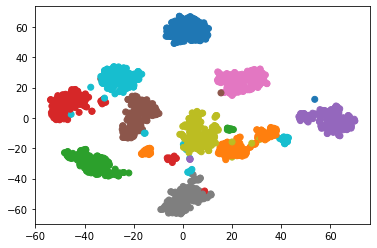

In [29]:
colors = list(matplotlib.colors.TABLEAU_COLORS)

label_colors = []
for idx in y:
    label_colors.append(colors[idx])
    
plt.scatter(x_tsne[:,0], x_tsne[:,1], c=label_colors)

رسم نمودار تعاملی داده بعد از اعمال تبدیل

In [30]:
x_for_plot = []
for i in range(10):
    x_for_plot.append(x_tsne[y==i])

In [31]:
fig, ax = plt.subplots()
ax.grid(True, alpha=0.3)


for i in range(10):
    ax.scatter(x_for_plot[i][:,0], x_for_plot[i][:,1], c=label_colors[i], label=i)
    
#define interactive legend

handles, labels = ax.get_legend_handles_labels() # return lines and labels
interactive_legend = plugins.InteractiveLegendPlugin(zip(handles,
                                                         ax.collections),
                                                     labels,
                                                     alpha_unsel=0.5,
                                                     alpha_over=1.5, 
                                                     start_visible=True)

plugins.connect(fig, interactive_legend)


mpld3.enable_notebook()
mpld3.display()

TypeError: Object of type ndarray is not JSON serializable